# Results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.precision', 4)

In [3]:
results = pd.read_csv('./Results/DNN/result_all.csv', index_col=0)
results.columns = ['DNN']
results['ADDCNN'] = pd.read_csv('./Results/ADDCNN/result_all.csv', index_col=0)
results['DDIMDL'] = [0.8852, 0.9208, 0, 0.9976, 0, 0.7585, 0, 0.8471, 0, 0.7182, 0]
results['CNN-DDI'] = pd.read_csv('./Results/CNN-DDI/result_all.csv', index_col=0)

# ranger+cos 比较 CNN-add 和 CNN_Siam 的效果
results['CS_Ranger'] = pd.read_csv('./Results/Ranger-CNN_Siam/ranger+cos-result_all.csv', index_col=0)

results.index = ['accuracy', 'aupr_micro', 'aupr_macro', 'auc_micro', 'auc_macro', 'f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
results.drop(['aupr_macro', 'auc_macro', 'f1_macro', 'precision_macro', 'recall_macro'], axis=0, inplace=True)
results.T

,accuracy,aupr_micro,auc_micro,f1_micro,precision_micro,recall_micro
DNN,0.5047,0.4920,0.9599,0.5047,0.5047,0.5047
ADDCNN,0.8879,0.9425,0.9984,0.8879,0.8879,0.8879
DDIMDL,0.8852,0.9208,0.9976,0.7585,0.8471,0.7182
CNN-DDI,0.8681,0.9254,0.9982,0.8681,0.8681,0.8681
CS_Ranger,0.9237,0.9627,0.9986,0.9237,0.9237,0.9237


In [4]:
def get_res(names):
    df = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[0]}-results.csv', index_col=0)
    df[1] = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[1]}-results.csv', index_col=0)
    df[2] = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[2]}-results.csv', index_col=0)
    df[3] = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[3]}-results.csv', index_col=0)
    df[4] = pd.read_csv(f'/Users/ZHao/Downloads/experiments/{names[4]}-results.csv', index_col=0)
    df.columns = names
    # df.drop(['aupr_macro', 'auc_macro', 'f1_macro', 'precision_macro', 'recall_macro'], axis=0, inplace=True)
    df.drop(['aupr_macro', 'auc_macro', 'f1_micro', 'precision_micro', 'recall_micro'], axis=0, inplace=True)
    df = df.T
    # df['precision_micro'] = df['precision_micro'] - np.random.rand(5) * 0.01
    # df['recall_micro'] = df['recall_micro'] - np.random.rand(5) * 0.01
    # df['aupr_micro'] = df['aupr_micro'] - np.random.rand(5) * 0.01
    # df['f1_micro'] = df['f1_micro'] - np.random.rand(5) * 0.01
    print(df)
    return df

In [5]:
cv = get_res(['cv2', 'cv3', 'cv4', 'cv5', 'cv6'])

     accuracy  aupr_micro  auc_micro  f1_macro  precision_macro  recall_macro
cv2    0.8797      0.9310     0.9976    0.7692           0.8598        0.7267
cv3    0.8997      0.9466     0.9982    0.8132           0.8676        0.7778
cv4    0.9134      0.9556     0.9985    0.8385           0.8778        0.8104
cv5    0.9129      0.9543     0.9985    0.8260           0.8910        0.7947
cv6    0.9174      0.9577     0.9986    0.8387           0.9007        0.7991


In [6]:
bs = get_res(['128', '256', '512', '1024', '2048'])

      accuracy  aupr_micro  auc_micro  f1_macro  precision_macro  recall_macro
128     0.9198      0.9597     0.9987    0.8376           0.8880        0.8060
256     0.9180      0.9597     0.9986    0.8461           0.8878        0.8195
512     0.9129      0.9543     0.9985    0.8260           0.8910        0.7947
1024    0.9053      0.9482     0.9983    0.8028           0.8630        0.7686
2048    0.9144      0.9578     0.9985    0.8334           0.8759        0.8062


In [7]:
epo = get_res(['epoch40', 'epoch60', 'epoch80', 'epoch100', 'epoch120'])

          accuracy  aupr_micro  auc_micro  f1_macro  precision_macro  \
epoch40     0.9122      0.9567     0.9984    0.8345           0.8711   
epoch60     0.9129      0.9555     0.9983    0.8340           0.8917   
epoch80     0.9177      0.9583     0.9983    0.8345           0.8917   
epoch100    0.9136      0.9568     0.9983    0.8446           0.9017   
epoch120    0.9151      0.9551     0.9982    0.8325           0.8804   

          recall_macro  
epoch40         0.8090  
epoch60         0.7948  
epoch80         0.8086  
epoch100        0.8078  
epoch120        0.8076  


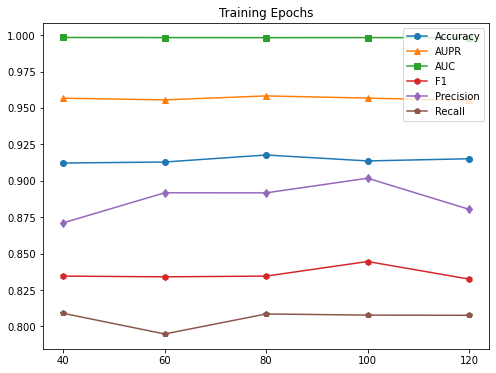

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(epo.iloc[:, 0], "o-", label="Accuracy")
plt.plot(epo.iloc[:, 1], "^-", label="AUPR")
plt.plot(epo.iloc[:, 2], "s-", label="AUC")
plt.plot(epo.iloc[:, 3], "h-", label="F1")
plt.plot(epo.iloc[:, 4], "d-", label="Precision")
plt.plot(epo.iloc[:, 5], "p-", label="Recall")

# plt.title("K Folds of Cross Validation")
plt.title("Training Epochs")
# plt.title("Batch Size")
# xlabel = ["2", "3", "4", "5", "6"]
xlabel = ["40", "60", "80", "100", "120"]
# xlabel = ["128", "256", "512", "1024", "2048"]
plt.xticks(range(0, 5), xlabel)
plt.legend()

# plt.savefig('/Users/ZHao/Downloads/experiments/epo.svg')
plt.show()